In [59]:
import pandas as pd
import numpy as np
from statistics import geometric_mean

import seaborn as sns
import matplotlib.pyplot as plt

from collections import OrderedDict
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_X_y

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.dummy import DummyClassifier

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [60]:
# import set1,2 for ml
ml = pd.read_csv('ml.csv')
ml = ml.drop(['Unnamed: 0'], axis = 1)
ml

,NAME,RANDOM SEED,TIME W/ CUTS,TIME W/O CUTS,NODES W/ CUTS,NODES W/O CUTS,PRESOLVING TIME W/O CUTS,PRESOLVING TIME W/ CUTS,TIME FIRST ROUND,TIME ROOT END,...,linbinpack_constr,linknaps_constr,linintknap_constr,linmixbin_constr,nonzeroes,obj_dyn,dynamism_mean,presol_vars,presol_int_vars,presol_constr
0,10teams.mps.gz,2,10.703114,11.865484,30,276,0.083092,0.156992,1.558014,3.545730,...,0.0,0.0,0.0,0.478261,0.026087,1.63347,0.0,7.377759,0.000000,5.347108
1,10teams.mps.gz,4,10.612878,11.812637,30,276,0.085024,0.088616,1.490672,3.482125,...,0.0,0.0,0.0,0.478261,0.026087,1.63347,0.0,7.377759,0.000000,5.347108
2,10teams.mps.gz,8,10.696199,11.836083,30,276,0.084062,0.143698,1.548765,3.544250,...,0.0,0.0,0.0,0.478261,0.026087,1.63347,0.0,7.377759,0.000000,5.347108
3,10teams.mps.gz,16,10.505375,11.912657,30,276,0.156648,0.084967,1.485573,3.461656,...,0.0,0.0,0.0,0.478261,0.026087,1.63347,0.0,7.377759,0.000000,5.347108
4,10teams.mps.gz,32,10.543100,12.023708,30,276,0.142738,0.087368,1.490006,3.467127,...,0.0,0.0,0.0,0.478261,0.026087,1.63347,0.0,7.377759,0.000000,5.347108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,wachplan.mps.gz,2,1670.502304,2121.061356,67520,98056,1.223909,1.224360,3.573959,132.251918,...,0.0,0.0,0.0,0.018030,0.017120,0.00000,0.0,7.741534,0.000434,6.582025
2056,wachplan.mps.gz,4,1228.673581,1517.447237,67520,98056,0.755146,0.799768,2.524237,96.536777,...,0.0,0.0,0.0,0.018030,0.017120,0.00000,0.0,7.741534,0.000434,6.582025
2057,wachplan.mps.gz,8,1221.583196,1518.448849,67520,98056,0.766641,0.806567,2.523101,96.622791,...,0.0,0.0,0.0,0.018030,0.017120,0.00000,0.0,7.741534,0.000434,6.582025
2058,wachplan.mps.gz,16,1644.899683,2131.242504,67520,98056,1.187851,1.262998,3.592139,130.866673,...,0.0,0.0,0.0,0.018030,0.017120,0.00000,0.0,7.741534,0.000434,6.582025


In [61]:
# take average values for all instances, reducing set to 426
ml = ml.groupby('NAME').mean()
ml = ml.reset_index()
ml

,NAME,RANDOM SEED,TIME W/ CUTS,TIME W/O CUTS,NODES W/ CUTS,NODES W/O CUTS,PRESOLVING TIME W/O CUTS,PRESOLVING TIME W/ CUTS,TIME FIRST ROUND,TIME ROOT END,...,linbinpack_constr,linknaps_constr,linintknap_constr,linmixbin_constr,nonzeroes,obj_dyn,dynamism_mean,presol_vars,presol_int_vars,presol_constr
0,10teams.mps.gz,12.4,10.612133,11.890114,30.0,276.0,0.110313,0.112328,1.514606,3.500178,...,0.0,0.0,0.0,0.478261,0.026087,1.63347,0.000000,7.377759,0.000000,5.347108
1,22433.mps.gz,12.4,2.894854,0.800995,1.0,5.0,0.061025,0.063045,0.222508,2.894823,...,0.0,0.0,0.0,1.000000,0.040121,0.00000,0.015269,6.061457,0.000000,5.288267
2,23588.mps.gz,12.4,5.013394,2.213224,576.0,981.0,0.051966,0.060869,0.188636,2.103051,...,0.0,0.0,0.0,1.000000,0.073409,0.00000,0.026683,5.908083,0.000000,4.919981
3,30_70_45_05_100.mps.gz,12.4,303.665869,248.788698,46.0,201.0,4.296265,5.476538,22.025534,160.027936,...,0.0,0.0,0.0,0.149627,0.000354,3.72884,0.000000,9.284334,0.000000,9.396654
4,30_70_45_095_100.mps.gz,12.4,855.303682,57.034050,201.0,1.0,5.892249,5.715616,23.540350,190.260823,...,0.0,0.0,0.0,0.164139,0.000339,3.78902,0.000000,9.303375,0.000000,9.435562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,uct-subprob.mps.gz,12.4,3255.584086,18000.007912,75300.0,2047898.0,0.096855,0.092664,0.415682,129.929653,...,0.0,0.0,0.0,0.874303,0.002280,0.90309,0.000000,7.703459,0.000000,7.541683
408,umts.mps.gz,12.4,1080.299948,13296.497325,144227.0,3106370.0,0.156619,0.151330,1.048357,42.416879,...,0.0,0.0,0.0,0.012094,0.001738,6.14613,0.027856,7.411556,0.039879,7.541152
409,unitcal_7.mps.gz,12.4,1045.198580,13891.858562,705.0,196989.0,6.214460,6.627529,80.321074,399.264404,...,0.0,0.0,0.0,0.356669,0.000101,4.30103,0.795567,10.083139,0.000000,10.642349
410,var-smallemery-m6j6.mps.gz,12.4,8376.147344,11757.510814,685889.0,836578.0,8.438041,8.363861,92.517442,95.372172,...,0.0,0.0,0.0,0.011181,0.011306,0.00000,0.039372,8.113127,0.000000,9.259321


In [62]:
# 0 corresponds to instance is solved faster using no cuts
# 1 corresponds to instance is solved faster using cuts 

# Label the set
time_label = []
for index, row in ml.iterrows():
    if row['TIME W/ CUTS'] > row['TIME W/O CUTS']:
        time_label.append(0)
    elif row['TIME W/ CUTS'] <= row['TIME W/O CUTS']:
        time_label.append(1)
    
ml['Time Label'] = time_label

ml

,NAME,RANDOM SEED,TIME W/ CUTS,TIME W/O CUTS,NODES W/ CUTS,NODES W/O CUTS,PRESOLVING TIME W/O CUTS,PRESOLVING TIME W/ CUTS,TIME FIRST ROUND,TIME ROOT END,...,linknaps_constr,linintknap_constr,linmixbin_constr,nonzeroes,obj_dyn,dynamism_mean,presol_vars,presol_int_vars,presol_constr,Time Label
0,10teams.mps.gz,12.4,10.612133,11.890114,30.0,276.0,0.110313,0.112328,1.514606,3.500178,...,0.0,0.0,0.478261,0.026087,1.63347,0.000000,7.377759,0.000000,5.347108,1
1,22433.mps.gz,12.4,2.894854,0.800995,1.0,5.0,0.061025,0.063045,0.222508,2.894823,...,0.0,0.0,1.000000,0.040121,0.00000,0.015269,6.061457,0.000000,5.288267,0
2,23588.mps.gz,12.4,5.013394,2.213224,576.0,981.0,0.051966,0.060869,0.188636,2.103051,...,0.0,0.0,1.000000,0.073409,0.00000,0.026683,5.908083,0.000000,4.919981,0
3,30_70_45_05_100.mps.gz,12.4,303.665869,248.788698,46.0,201.0,4.296265,5.476538,22.025534,160.027936,...,0.0,0.0,0.149627,0.000354,3.72884,0.000000,9.284334,0.000000,9.396654,0
4,30_70_45_095_100.mps.gz,12.4,855.303682,57.034050,201.0,1.0,5.892249,5.715616,23.540350,190.260823,...,0.0,0.0,0.164139,0.000339,3.78902,0.000000,9.303375,0.000000,9.435562,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,uct-subprob.mps.gz,12.4,3255.584086,18000.007912,75300.0,2047898.0,0.096855,0.092664,0.415682,129.929653,...,0.0,0.0,0.874303,0.002280,0.90309,0.000000,7.703459,0.000000,7.541683,1
408,umts.mps.gz,12.4,1080.299948,13296.497325,144227.0,3106370.0,0.156619,0.151330,1.048357,42.416879,...,0.0,0.0,0.012094,0.001738,6.14613,0.027856,7.411556,0.039879,7.541152,1
409,unitcal_7.mps.gz,12.4,1045.198580,13891.858562,705.0,196989.0,6.214460,6.627529,80.321074,399.264404,...,0.0,0.0,0.356669,0.000101,4.30103,0.795567,10.083139,0.000000,10.642349,1
410,var-smallemery-m6j6.mps.gz,12.4,8376.147344,11757.510814,685889.0,836578.0,8.438041,8.363861,92.517442,95.372172,...,0.0,0.0,0.011181,0.011306,0.00000,0.039372,8.113127,0.000000,9.259321,1


In [63]:
# Split features and label
X = ml.iloc[0:, 0:-1]
y = ml.iloc[0:, -1]
X

,NAME,RANDOM SEED,TIME W/ CUTS,TIME W/O CUTS,NODES W/ CUTS,NODES W/O CUTS,PRESOLVING TIME W/O CUTS,PRESOLVING TIME W/ CUTS,TIME FIRST ROUND,TIME ROOT END,...,linbinpack_constr,linknaps_constr,linintknap_constr,linmixbin_constr,nonzeroes,obj_dyn,dynamism_mean,presol_vars,presol_int_vars,presol_constr
0,10teams.mps.gz,12.4,10.612133,11.890114,30.0,276.0,0.110313,0.112328,1.514606,3.500178,...,0.0,0.0,0.0,0.478261,0.026087,1.63347,0.000000,7.377759,0.000000,5.347108
1,22433.mps.gz,12.4,2.894854,0.800995,1.0,5.0,0.061025,0.063045,0.222508,2.894823,...,0.0,0.0,0.0,1.000000,0.040121,0.00000,0.015269,6.061457,0.000000,5.288267
2,23588.mps.gz,12.4,5.013394,2.213224,576.0,981.0,0.051966,0.060869,0.188636,2.103051,...,0.0,0.0,0.0,1.000000,0.073409,0.00000,0.026683,5.908083,0.000000,4.919981
3,30_70_45_05_100.mps.gz,12.4,303.665869,248.788698,46.0,201.0,4.296265,5.476538,22.025534,160.027936,...,0.0,0.0,0.0,0.149627,0.000354,3.72884,0.000000,9.284334,0.000000,9.396654
4,30_70_45_095_100.mps.gz,12.4,855.303682,57.034050,201.0,1.0,5.892249,5.715616,23.540350,190.260823,...,0.0,0.0,0.0,0.164139,0.000339,3.78902,0.000000,9.303375,0.000000,9.435562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,uct-subprob.mps.gz,12.4,3255.584086,18000.007912,75300.0,2047898.0,0.096855,0.092664,0.415682,129.929653,...,0.0,0.0,0.0,0.874303,0.002280,0.90309,0.000000,7.703459,0.000000,7.541683
408,umts.mps.gz,12.4,1080.299948,13296.497325,144227.0,3106370.0,0.156619,0.151330,1.048357,42.416879,...,0.0,0.0,0.0,0.012094,0.001738,6.14613,0.027856,7.411556,0.039879,7.541152
409,unitcal_7.mps.gz,12.4,1045.198580,13891.858562,705.0,196989.0,6.214460,6.627529,80.321074,399.264404,...,0.0,0.0,0.0,0.356669,0.000101,4.30103,0.795567,10.083139,0.000000,10.642349
410,var-smallemery-m6j6.mps.gz,12.4,8376.147344,11757.510814,685889.0,836578.0,8.438041,8.363861,92.517442,95.372172,...,0.0,0.0,0.0,0.011181,0.011306,0.00000,0.039372,8.113127,0.000000,9.259321


In [64]:
# Drop unnecessary columns and split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
X_train = X_train.drop(['NAME', 'RANDOM SEED', 'TIME W/ CUTS', 'TIME W/O CUTS', 'TIME FIRST ROUND', 'NODES W/ CUTS', 'NODES W/O CUTS',
                        'TIME ROOT END', 'FIRST ROUND CUT', 'ROUND OF CUTS', 'OBJECTIVE VALUE ROOT NODE'], axis = 1)
cols = X_train.copy()
X_test = X_test.drop(['NAME', 'RANDOM SEED', 'TIME W/ CUTS', 'TIME W/O CUTS', 'TIME FIRST ROUND', 'NODES W/ CUTS', 'NODES W/O CUTS',
                      'TIME ROOT END', 'FIRST ROUND CUT', 'ROUND OF CUTS', 'OBJECTIVE VALUE ROOT NODE'], axis = 1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
cols

(329, 23) (329,)
(83, 23) (83,)


,PRESOLVING TIME W/O CUTS,PRESOLVING TIME W/ CUTS,INITIAL LP,vars,bin_vars,int_vars,cont_vars,constr,linsetpart_constr,linsetpack_constr,...,linbinpack_constr,linknaps_constr,linintknap_constr,linmixbin_constr,nonzeroes,obj_dyn,dynamism_mean,presol_vars,presol_int_vars,presol_constr
301,1.318386,1.328128,-4.311300e+04,9.080915,0.949237,0.000000,0.050763,6.943122,0.000000,0.530888,...,0.00000,0.009653,0.0,0.384170,0.027679,0.000000,0.003399,9.080915,0.000000,6.943122
20,0.708693,0.569771,-4.046500e+04,8.881142,1.000000,0.000000,0.000000,6.054439,1.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.017005,1.883900,0.000000,8.881142,0.000000,6.054439
302,15.283530,16.314402,-4.390700e+04,10.053114,0.999828,0.000172,0.000000,10.743415,0.000000,0.000086,...,0.00000,0.048960,0.0,0.497884,0.000291,3.431360,0.248909,10.048280,0.000173,10.740995
142,1.398327,1.440043,-1.056607e+09,6.721426,1.000000,0.000000,0.000000,9.039433,0.000000,0.000000,...,0.00000,0.001186,0.0,0.000000,0.002775,4.193520,0.002849,6.721426,0.000000,9.039433
14,0.932396,0.935338,0.000000e+00,7.390181,1.000000,0.000000,0.000000,8.097122,0.079452,0.049315,...,0.00000,0.000000,0.0,0.002740,0.003208,0.000000,0.000000,7.390181,0.000000,8.097122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.818412,0.839884,5.441667e+01,9.235033,0.998049,0.001951,0.000000,8.166784,0.179443,0.400341,...,0.00000,0.000000,0.0,0.022714,0.005651,1.414970,0.000000,9.231123,0.001959,8.163941
192,49.493340,42.641203,3.328500e+02,9.068201,0.922190,0.000000,0.077810,9.433484,0.006000,0.000000,...,0.00000,0.002000,0.0,0.526000,0.000569,1.609540,0.919256,8.902456,0.000000,8.481566
117,2155.350129,2076.720448,-4.208000e+03,9.013230,0.999878,0.000122,0.000000,9.706194,0.000000,0.000000,...,0.49997,0.494732,0.0,0.000000,0.012595,0.000000,1.711370,9.013108,0.000122,9.706194
47,0.444046,0.413538,0.000000e+00,10.118317,0.099504,0.000000,0.900496,9.221478,0.000000,0.000000,...,0.00000,0.000000,0.0,0.024130,0.000257,4.603010,1.794820,9.023167,0.000000,9.221478


In [65]:
# Scale the features
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
# Feature Selection
cols = cols.iloc[0:, 0:]

bestfeatures = SelectKBest(score_func=f_classif, k = 'all')
fit = bestfeatures.fit(X_train,y_train)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(cols.columns)
featureScores = pd.concat([columns,scores],axis=1)
featureScores
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(23,'Score')) #print best features
data=featureScores.nlargest(23,'Score')

                    Features     Score
18                   obj_dyn  5.789008
17                 nonzeroes  4.693260
1    PRESOLVING TIME W/ CUTS  2.401543
0   PRESOLVING TIME W/O CUTS  2.287206
2                 INITIAL LP  1.253763
6                  cont_vars  1.108062
4                   bin_vars  0.914219
12          lineqknap_constr  0.883556
8          linsetpart_constr  0.844224
11            lincard_constr  0.818363
10          linsetcov_constr  0.651937
13         linbinpack_constr  0.459353
20               presol_vars  0.393355
3                       vars  0.283656
16          linmixbin_constr  0.231883
15         linintknap_constr  0.112070
7                     constr  0.104638
21           presol_int_vars  0.096689
22             presol_constr  0.035039
5                   int_vars  0.008976
14           linknaps_constr  0.000316
9          linsetpack_constr  0.000144
19             dynamism_mean  0.000073


In [67]:
# Drop bottom 7 features
X = ml.drop(['Time Label', 'dynamism_mean', 'linsetpack_constr',
              'linknaps_constr', 'int_vars', 'presol_constr', 'presol_int_vars', 'constr'], axis = 1)

y = ml.iloc[0:, -1]

In [68]:
# split again with reuiqred features only
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

test_df = X_test.copy()
train_df = X_train.copy()

X_train = X_train.drop(['NAME', 'RANDOM SEED', 'TIME W/ CUTS', 'TIME W/O CUTS', 'TIME FIRST ROUND', 'NODES W/ CUTS', 'NODES W/O CUTS',
                        'TIME ROOT END', 'FIRST ROUND CUT', 'ROUND OF CUTS', 'OBJECTIVE VALUE ROOT NODE'], axis = 1)
X_test = X_test.drop(['NAME', 'RANDOM SEED', 'TIME W/ CUTS', 'TIME W/O CUTS', 'TIME FIRST ROUND', 'NODES W/ CUTS', 'NODES W/O CUTS',
                      'TIME ROOT END', 'FIRST ROUND CUT', 'ROUND OF CUTS', 'OBJECTIVE VALUE ROOT NODE'], axis = 1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(329, 16) (329,)
(83, 16) (83,)


In [69]:
# Scale
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
# Grid Search

model_params={'svm':{'model': SVC(kernel = 'rbf', random_state = 0), 
                    'params':{'C':[10, 100, 1000], 'gamma': [1e-2, 1e-3, 1e-4]
                             }
                    },
              'rfm':{'model': RandomForestClassifier(random_state = 0), 
                    'params':{'n_estimators':[100, 200, 500], 
                             'max_depth':[5, 10, 15]
                             }
                    },
              'lrm':{'model': LogisticRegression(solver='lbfgs', random_state = 0), 
                    'params':{'C':[10, 100, 1000], 
                              'max_iter':[100, 500, 1000]
                             }
                    },
              'et':{'model': ExtraTreesClassifier(random_state=0), 
                    'params':{'n_estimators': [100, 200, 500], 
                              'max_depth': [5, 10, 15]
                             }
                    },
              'nn':{'model': MLPClassifier(solver='lbfgs', batch_size='auto', learning_rate='constant', 
                                           power_t=0.5, max_iter=500, shuffle=True, tol=0.00001, verbose=True, 
                                           early_stopping=False, validation_fraction=0.1, random_state=0),
                    'params':{'hidden_layer_sizes': [(5, ), (10, ), (15, )],
                                 'learning_rate_init': [1e-1, 1e-2, 1e-3],
                                 'alpha':  [1e-2, 1e-3, 1e-4],
                                 'activation': ['tanh', 'relu', 'logistic']
                             }
                    }
              
             }
scores=[]
for model_name, mp in model_params.items():
    clf=GridSearchCV(mp['model'], mp['params'], cv = None, return_train_score = False, n_jobs = -1)
    clf.fit(X_train, y_train)
    scores.append({'model': model_name, 'best_score':clf.best_score_, 'best_params':clf.best_params_})

C:\Users\ambar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [14]:
# Grid Search scores
scores=pd.DataFrame(scores).sort_values(by = ['best_score'], ascending = False)
scores.to_csv('gridsearch_exp_1.csv')

In [84]:
# Run models
scores = OrderedDict()
target_names = ['0', '1']

print('SUPPORT VECTOR MACHINES')
clf = SVC(random_state = 0, C = 10, gamma = 0.01, kernel = 'rbf')
clf.fit(X_train, y_train)
y_train_pred_svm = clf.predict(X_train)
y_test_pred_svm = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_svm)
mse_test = mean_squared_error(y_test, y_test_pred_svm)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_svm, target_names=target_names))
scores['SVC'] = [score, metrics.precision_score(y_test, y_test_pred_svm), metrics.recall_score(y_test, y_test_pred_svm),
                      metrics.f1_score(y_test, y_test_pred_svm), mse_test, mse_train]

print('##################################')
print('NEURAL NETWORKS')
clf = MLPClassifier(solver='lbfgs', batch_size='auto', learning_rate='constant', power_t=0.5, max_iter=500, 
                    shuffle=True, tol=0.00001, verbose=True, 
                    early_stopping=False, validation_fraction=0.1,
                    hidden_layer_sizes=(10, ), activation='logistic', alpha=0.001, 
                    learning_rate_init=0.1, random_state=0)
clf.fit(X_train, y_train)
y_train_pred_nn = clf.predict(X_train)
y_test_pred_nn = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_nn)
mse_test = mean_squared_error(y_test, y_test_pred_nn)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_nn, target_names=target_names))
scores['NN'] = [score, metrics.precision_score(y_test, y_test_pred_nn), metrics.recall_score(y_test, y_test_pred_nn),
                      metrics.f1_score(y_test, y_test_pred_nn), mse_test, mse_train]

print('##################################')
print('DECISION TREES')
clf = ExtraTreesClassifier(random_state=0, max_depth = 15, n_estimators = 500)
clf.fit(X_train, y_train)
y_train_pred_et = clf.predict(X_train)
y_test_pred_et = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_et)
mse_test = mean_squared_error(y_test, y_test_pred_et)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_et, target_names=target_names))
scores['ET'] = [score, metrics.precision_score(y_test, y_test_pred_et), 
                         metrics.recall_score(y_test, y_test_pred_et), 
                         metrics.f1_score(y_test, y_test_pred_et), mse_test, mse_train]

print('##################################')
print('LOGISTIC REGRESSION')
clf = LogisticRegression(solver='lbfgs', random_state = 0, C = 100, max_iter = 100)
clf.fit(X_train, y_train)
y_train_pred_lr = clf.predict(X_train)
y_test_pred_lr = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_lr)
mse_test = mean_squared_error(y_test, y_test_pred_lr)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_lr, target_names=target_names))
scores['LR'] = [score, metrics.precision_score(y_test, y_test_pred_lr), metrics.recall_score(y_test, y_test_pred_lr),
                      metrics.f1_score(y_test, y_test_pred_lr), mse_test, mse_train]

print('##################################')
print('RANDOM FOREST')
clf = RandomForestClassifier(random_state = 0, max_depth = 15, n_estimators = 200)
clf.fit(X_train, y_train)
y_train_pred_rf = clf.predict(X_train)
y_test_pred_rf = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_rf)
mse_test = mean_squared_error(y_test, y_test_pred_rf)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_rf, target_names=target_names))
scores['RF'] = [score, metrics.precision_score(y_test, y_test_pred_rf), metrics.recall_score(y_test, y_test_pred_rf),
                      metrics.f1_score(y_test, y_test_pred_rf), mse_test, mse_train]

SUPPORT VECTOR MACHINES
MSE Test: 0.4578313253012048, MSE Train: 0.3799392097264438
Accuracy score: 0.5421686746987951

              precision    recall  f1-score   support

           0       0.86      0.14      0.24        43
           1       0.51      0.97      0.67        40

    accuracy                           0.54        83
   macro avg       0.69      0.56      0.46        83
weighted avg       0.69      0.54      0.45        83

##################################
NEURAL NETWORKS


C:\Users\ambar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MSE Test: 0.4457831325301205, MSE Train: 0.06990881458966565
Accuracy score: 0.5542168674698795

              precision    recall  f1-score   support

           0       0.59      0.44      0.51        43
           1       0.53      0.68      0.59        40

    accuracy                           0.55        83
   macro avg       0.56      0.56      0.55        83
weighted avg       0.56      0.55      0.55        83

##################################
DECISION TREES
MSE Test: 0.4819277108433735, MSE Train: 0.0
Accuracy score: 0.5180722891566265

              precision    recall  f1-score   support

           0       0.54      0.51      0.52        43
           1       0.50      0.53      0.51        40

    accuracy                           0.52        83
   macro avg       0.52      0.52      0.52        83
weighted avg       0.52      0.52      0.52        83

##################################
LOGISTIC REGRESSION
MSE Test: 0.4939759036144578, MSE Train: 0.40425531914893614
Ac

In [85]:
# model scores table
scores_df = pd.DataFrame.from_dict(scores, orient='index')
scores_df.columns=['accuracy', 'precision', 'recall', 'f1-score', 'mse test', 'mse train']
scores_df

,accuracy,precision,recall,f1-score,mse test,mse train
SVC,0.542169,0.513158,0.975,0.672414,0.457831,0.379939
NN,0.554217,0.529412,0.675,0.593407,0.445783,0.069909
ET,0.518072,0.500000,0.525,0.512195,0.481928,0.000000
LR,0.506024,0.491803,0.750,0.594059,0.493976,0.404255
RF,0.542169,0.522727,0.575,0.547619,0.457831,0.000000


ANALYSIS ON TEST DATA

In [86]:
test_df['PLabel NN'] = y_test_pred_nn
test_df['PLabel ET'] = y_test_pred_et
test_df['PLabel RF'] = y_test_pred_rf

test_feat = ml.filter(['NAME', 'Time Label'])
analysis = test_df.merge(test_feat, on = ['NAME'], how = 'left')
analysis = analysis.filter(['NAME', 'TIME W/ CUTS', 'TIME W/O CUTS', 
                            'NODES W/ CUTS', 'NODES W/O CUTS', 'PLabel NN', 'PLabel ET', 'PLabel RF', 'Time Label'])
analysis['Minimum Time'] = analysis[['TIME W/O CUTS', 'TIME W/ CUTS']].min(axis = 1)
analysis['Minimum Nodes'] = analysis[['NODES W/O CUTS', 'NODES W/ CUTS']].min(axis = 1)

analysis

,NAME,TIME W/ CUTS,TIME W/O CUTS,NODES W/ CUTS,NODES W/O CUTS,PLabel NN,PLabel ET,PLabel RF,Time Label,Minimum Time,Minimum Nodes
0,sorrell3.mps.gz,17329.188580,18000.008912,31084.4,556362.8,1,1,1,1,17329.188580,31084.4
1,neos-1430701.mps.gz,14.655323,6.074282,4417.0,4846.0,0,1,1,0,6.074282,4417.0
2,neos-4805882-barwon.mps.gz,595.238682,1033.522239,14721.0,36738.0,1,1,1,1,595.238682,14721.0
3,p200x1188c.mps.gz,4.135842,3507.467790,1.0,1044095.0,1,1,1,1,4.135842,1.0
4,pigeon-10.mps.gz,15.774715,125.919814,36051.0,436711.0,1,1,1,1,15.774715,36051.0
...,...,...,...,...,...,...,...,...,...,...,...
78,nh97_potential.mps.gz,423.882664,59.881896,39116.0,32984.0,1,1,1,0,59.881896,32984.0
79,gfd-schedulen55f2d50m30k3i.mps.gz,17791.473241,18001.918515,3366.8,8032.6,0,0,0,1,17791.473241,3366.8
80,Test3.mps.gz,8.171018,18.910335,1.0,426.0,1,0,0,1,8.171018,1.0
81,app1-1.mps.gz,8.058875,0.786117,12.0,4.0,1,1,1,0,0.786117,4.0


In [87]:
rf_pred_time = []
rf_pred_nodes = []        
for index, row in analysis.iterrows():
    if row['PLabel RF'] == 1.0:
        rf_pred_time.append(row['TIME W/ CUTS'])
        rf_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel RF'] == 0.0:
        rf_pred_time.append(row['TIME W/O CUTS'])
        rf_pred_nodes.append(row['NODES W/O CUTS'])

nn_pred_time = []
nn_pred_nodes = []        
for index, row in analysis.iterrows():
    if row['PLabel NN'] == 1.0:
        nn_pred_time.append(row['TIME W/ CUTS'])
        nn_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel NN'] == 0.0:
        nn_pred_time.append(row['TIME W/O CUTS'])
        nn_pred_nodes.append(row['NODES W/O CUTS'])

et_pred_time = []
et_pred_nodes = []        
for index, row in analysis.iterrows():
    if row['PLabel ET'] == 1.0:
        et_pred_time.append(row['TIME W/ CUTS'])
        et_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel ET'] == 0.0:
        et_pred_time.append(row['TIME W/O CUTS'])
        et_pred_nodes.append(row['NODES W/O CUTS'])

        
analysis['PTime RF'] = rf_pred_time
analysis['PTime NN'] = nn_pred_time
analysis['PTime ET'] = et_pred_time

analysis['PNodes RF'] = rf_pred_nodes
analysis['PNodes NN'] = nn_pred_nodes
analysis['PNodes ET'] = et_pred_nodes

analysis

,NAME,TIME W/ CUTS,TIME W/O CUTS,NODES W/ CUTS,NODES W/O CUTS,PLabel NN,PLabel ET,PLabel RF,Time Label,Minimum Time,Minimum Nodes,PTime RF,PTime NN,PTime ET,PNodes RF,PNodes NN,PNodes ET
0,sorrell3.mps.gz,17329.188580,18000.008912,31084.4,556362.8,1,1,1,1,17329.188580,31084.4,17329.188580,17329.188580,17329.188580,31084.4,31084.4,31084.4
1,neos-1430701.mps.gz,14.655323,6.074282,4417.0,4846.0,0,1,1,0,6.074282,4417.0,14.655323,6.074282,14.655323,4417.0,4846.0,4417.0
2,neos-4805882-barwon.mps.gz,595.238682,1033.522239,14721.0,36738.0,1,1,1,1,595.238682,14721.0,595.238682,595.238682,595.238682,14721.0,14721.0,14721.0
3,p200x1188c.mps.gz,4.135842,3507.467790,1.0,1044095.0,1,1,1,1,4.135842,1.0,4.135842,4.135842,4.135842,1.0,1.0,1.0
4,pigeon-10.mps.gz,15.774715,125.919814,36051.0,436711.0,1,1,1,1,15.774715,36051.0,15.774715,15.774715,15.774715,36051.0,36051.0,36051.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,nh97_potential.mps.gz,423.882664,59.881896,39116.0,32984.0,1,1,1,0,59.881896,32984.0,423.882664,423.882664,423.882664,39116.0,39116.0,39116.0
79,gfd-schedulen55f2d50m30k3i.mps.gz,17791.473241,18001.918515,3366.8,8032.6,0,0,0,1,17791.473241,3366.8,18001.918515,18001.918515,18001.918515,8032.6,8032.6,8032.6
80,Test3.mps.gz,8.171018,18.910335,1.0,426.0,1,0,0,1,8.171018,1.0,18.910335,8.171018,18.910335,426.0,1.0,426.0
81,app1-1.mps.gz,8.058875,0.786117,12.0,4.0,1,1,1,0,0.786117,4.0,8.058875,8.058875,8.058875,12.0,12.0,12.0


In [88]:
testing = analysis.copy()

In [89]:
bb_classes = ['Geometric Mean']
num_bb_classes = len(bb_classes)

bucket_min = [0, 10, 100, 1000, 3600]
bucket_max = [18000, 18000, 18000, 18000, 18000]
num_buckets = len(bucket_min)
assert(len(bucket_max) == num_buckets)
bb_buckets = ['[' + str(bucket_min[j]) + ',' + str(bucket_max[j]) + ')' for j in range(num_buckets)]

bb_metrics = ['Gmean']

In [90]:
avg_bb_cols = pd.MultiIndex.from_product([['Time','Node'],
                                     ['Cut','No Cut', 'Perfect', 'RF', 'ET', 'NN']],
                                    names=['Parameter','Setting'])

bb_row_names = pd.MultiIndex.from_product(
    [bb_classes, bb_buckets],
    names=['Metric', 'Bucket'])

avg_bb_df = pd.DataFrame(
    index = bb_row_names,
    dtype = float)

avg_bb_df = pd.DataFrame(
    columns = avg_bb_cols,
    index = bb_row_names,
    dtype = float)

In [91]:
df_0 = analysis[(analysis['Minimum Time'] >= 0)]
df_10 = analysis[(analysis['Minimum Time'] >= 10)]
df_100 = analysis[(analysis['Minimum Time'] >= 100)]
df_1000 = analysis[(analysis['Minimum Time'] >= 1000)]
df_3600 = analysis[(analysis['Minimum Time'] >= 3600)]

In [92]:
SHIFT_TIME = 60
SHIFT_NODES = 1000

df = [df_0, df_10, df_100, df_1000, df_3600]
t_cuts = []
t_nocuts = []
t_perfect = []
t_rf = []
t_et = []
t_nn = []

n_cuts = []
n_nocuts = []
n_perfect = []
n_rf = []
n_et = []
n_nn = []

instances = []

for data in df:
    time_nocuts = data['TIME W/O CUTS'].tolist()
    time_cuts = data['TIME W/ CUTS'].tolist()
    time_perfect = data['Minimum Time'].tolist()
    time_rf = data['PTime RF'].tolist()
    time_et = data['PTime ET'].tolist()
    time_nn = data['PTime NN'].tolist()
    
    timeshift_nocuts = [i + SHIFT_TIME for i in time_nocuts]
    timeshift_cuts = [i + SHIFT_TIME for i in time_cuts]
    timeshift_perfect = [i + SHIFT_TIME for i in time_perfect]
    timeshift_rf = [i + SHIFT_TIME for i in time_rf]
    timeshift_et = [i + SHIFT_TIME for i in time_et]
    timeshift_nn = [i + SHIFT_TIME for i in time_nn]
    
    
    time_geom_nocuts = geometric_mean(timeshift_nocuts) - SHIFT_TIME
    time_geom_cuts = geometric_mean(timeshift_cuts) - SHIFT_TIME
    time_geom_perfect = geometric_mean(timeshift_perfect) - SHIFT_TIME
    time_geom_rf = geometric_mean(timeshift_rf) - SHIFT_TIME
    time_geom_et = geometric_mean(timeshift_et) - SHIFT_TIME
    time_geom_nn = geometric_mean(timeshift_nn) - SHIFT_TIME
    
    
    t_nocuts.append(time_geom_nocuts)
    t_cuts.append(time_geom_cuts)
    t_perfect.append(time_geom_perfect)
    t_rf.append(time_geom_rf)
    t_et.append(time_geom_et)
    t_nn.append(time_geom_nn)
    
    nodes_nocuts = data['NODES W/O CUTS'].tolist()
    nodes_cuts = data['NODES W/ CUTS'].tolist()
    nodes_perfect = data['Minimum Nodes'].tolist()
    nodes_rf = data['PNodes RF'].tolist()
    nodes_et = data['PNodes ET'].tolist()
    nodes_nn = data['PNodes NN'].tolist()
    
    nodeshift_nocuts = [i + SHIFT_NODES for i in nodes_nocuts]
    nodeshift_cuts = [i + SHIFT_NODES for i in nodes_cuts]
    nodeshift_perfect = [i + SHIFT_NODES for i in nodes_perfect]
    nodeshift_rf = [i + SHIFT_NODES for i in nodes_rf]
    nodeshift_et = [i + SHIFT_NODES for i in nodes_et]
    nodeshift_nn = [i + SHIFT_NODES for i in nodes_nn]
    
    nodes_geom_nocuts = geometric_mean(nodeshift_nocuts) - SHIFT_NODES
    nodes_geom_cuts = geometric_mean(nodeshift_cuts) - SHIFT_NODES
    nodes_geom_perfect = geometric_mean(nodeshift_perfect) - SHIFT_NODES
    nodes_geom_rf = geometric_mean(nodeshift_rf) - SHIFT_NODES
    nodes_geom_et = geometric_mean(nodeshift_et) - SHIFT_NODES
    nodes_geom_nn = geometric_mean(nodeshift_nn) - SHIFT_NODES
    
    n_nocuts.append(nodes_geom_nocuts)
    n_cuts.append(nodes_geom_cuts)
    n_perfect.append(nodes_geom_perfect)
    n_rf.append(nodes_geom_rf)
    n_et.append(nodes_geom_et)
    n_nn.append(nodes_geom_nn)
    
    instances.append(len(data))

In [93]:
avg_bb_df['Instances'] = instances

avg_bb_df[('Time', 'Cut')] = t_cuts
avg_bb_df[('Time', 'No Cut')] = t_nocuts

avg_bb_df[('Time', 'RF')] = t_rf
avg_bb_df[('Time', 'ET')] = t_et
avg_bb_df[('Time', 'NN')] = t_nn

avg_bb_df[('Time', 'Perfect')] = t_perfect

avg_bb_df[('Node', 'Cut')] = n_cuts
avg_bb_df[('Node', 'No Cut')] = n_nocuts

avg_bb_df[('Node', 'RF')] = n_rf
avg_bb_df[('Node', 'ET')] = n_et
avg_bb_df[('Node', 'NN')] = n_nn

avg_bb_df[('Node', 'Perfect')] = n_perfect

avg_bb_df

Parameter                            Time                             \
Setting                               Cut        No Cut      Perfect   
Metric         Bucket                                                  
Geometric Mean [0,18000)       305.992207    419.764695   220.382529   
               [10,18000)      490.862833    667.788488   339.339751   
               [100,18000)    1949.088279   2729.198804  1355.798841   
               [1000,18000)   6958.617655   5197.067848  3839.231527   
               [3600,18000)  11287.528880  10967.804796  8220.224291   

Parameter                                                              \
Setting                                RF            ET            NN   
Metric         Bucket                                                   
Geometric Mean [0,18000)       337.136506    325.050080    315.220461   
               [10,18000)      548.448773    525.593208    509.902422   
               [100,18000)    2529.271680   2338.187120   2022.323894   
               [1000,18000)   5594.675302   5404.777023   5245.857942   
               [3600,18000)  11317.771797  10160.364386  11628.614848   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)      4670.700180   12678.045659   3963.550352   
               [10,18000)     7056.030445   20071.820044   5835.364417   
               [100,18000)   19378.205174   51397.447551  15022.403303   
               [1000,18000)  75677.901320  146270.756630  50212.863774   
               [3600,18000)  68298.201397  205377.452300  55417.799520   

Parameter                                                               \
Setting                                RF            ET             NN   
Metric         Bucket                                                    
Geometric Mean [0,18000)      6200.682692   6325.873649    6148.412834   
               [10,18000)     9628.868164   9858.264402    9552.627697   
               [100,18000)   28495.642444  29893.404366   25100.587335   
               [1000,18000)  76604.929617  79969.034503   82473.708579   
               [3600,18000)  83315.024737  84439.556585  123258.438956   

Parameter                   Instances  
Setting                                
Metric         Bucket                  
Geometric Mean [0,18000)           83  
               [10,18000)          67  
               [100,18000)         36  
               [1000,18000)        20  
               [3600,18000)        10

In [94]:
# RF
imp_time_rf = []
imp_nodes_rf = []

for i, j in zip(t_rf, t_cuts):
    imp = ((i-j)/j)*100
    imp_time_rf.append(imp)

for i, j in zip(n_rf, n_cuts):
    imp = ((i - j)/j) * 100
    imp_nodes_rf.append(imp)

In [95]:
# RF
avg_bb_df[('Improvement (%)', 'Time')] = imp_time_rf
avg_bb_df[('Improvement (%)', 'Nodes')] = imp_nodes_rf

avg_bb_df

Parameter                            Time                             \
Setting                               Cut        No Cut      Perfect   
Metric         Bucket                                                  
Geometric Mean [0,18000)       305.992207    419.764695   220.382529   
               [10,18000)      490.862833    667.788488   339.339751   
               [100,18000)    1949.088279   2729.198804  1355.798841   
               [1000,18000)   6958.617655   5197.067848  3839.231527   
               [3600,18000)  11287.528880  10967.804796  8220.224291   

Parameter                                                              \
Setting                                RF            ET            NN   
Metric         Bucket                                                   
Geometric Mean [0,18000)       337.136506    325.050080    315.220461   
               [10,18000)      548.448773    525.593208    509.902422   
               [100,18000)    2529.271680   2338.187120   2022.323894   
               [1000,18000)   5594.675302   5404.777023   5245.857942   
               [3600,18000)  11317.771797  10160.364386  11628.614848   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)      4670.700180   12678.045659   3963.550352   
               [10,18000)     7056.030445   20071.820044   5835.364417   
               [100,18000)   19378.205174   51397.447551  15022.403303   
               [1000,18000)  75677.901320  146270.756630  50212.863774   
               [3600,18000)  68298.201397  205377.452300  55417.799520   

Parameter                                                               \
Setting                                RF            ET             NN   
Metric         Bucket                                                    
Geometric Mean [0,18000)      6200.682692   6325.873649    6148.412834   
               [10,18000)     9628.868164   9858.264402    9552.627697   
               [100,18000)   28495.642444  29893.404366   25100.587335   
               [1000,18000)  76604.929617  79969.034503   82473.708579   
               [3600,18000)  83315.024737  84439.556585  123258.438956   

Parameter                   Instances Improvement (%)             
Setting                                          Time      Nodes  
Metric         Bucket                                             
Geometric Mean [0,18000)           83       10.178135  32.757027  
               [10,18000)          67       11.731575  36.462962  
               [100,18000)         36       29.766912  47.049957  
               [1000,18000)        20      -19.600766   1.224966  
               [3600,18000)        10        0.267932  21.987143

ANALYSIS ON TRAINING DATA

In [96]:
train_df

,NAME,RANDOM SEED,TIME W/ CUTS,TIME W/O CUTS,NODES W/ CUTS,NODES W/O CUTS,PRESOLVING TIME W/O CUTS,PRESOLVING TIME W/ CUTS,TIME FIRST ROUND,TIME ROOT END,...,linsetpart_constr,linsetcov_constr,lincard_constr,lineqknap_constr,linbinpack_constr,linintknap_constr,linmixbin_constr,nonzeroes,obj_dyn,presol_vars
301,neos6.mps.gz,12.4,359.802449,763.751253,3667.0,9640.0,1.318386,1.328128,7.903111,35.818605,...,0.000000,0.046332,0.000000,0.0,0.00000,0.0,0.384170,0.027679,0.000000,9.080915
20,air05.mps.gz,12.4,57.406171,61.438768,523.0,722.0,0.708693,0.569771,2.880742,9.191769,...,1.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.017005,1.883900,8.881142
302,neos8.mps.gz,12.4,16.581155,59.514736,1.0,1.0,15.283530,16.314402,16.576975,16.580288,...,0.000000,0.000000,0.000259,0.0,0.00000,0.0,0.497884,0.000291,3.431360,10.048280
142,mine-166-5.mps.gz,12.4,50.761649,13.176230,2681.0,1228.0,1.398327,1.440043,2.540589,39.370016,...,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.002775,4.193520,6.721426
14,acc-tight4.mps.gz,12.4,229.533662,127.543186,1087.0,674.0,0.932396,0.935338,11.705137,32.163774,...,0.079452,0.002740,0.010959,0.0,0.00000,0.0,0.002740,0.003208,0.000000,7.390181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,nursesched-sprint02.mps.gz,12.4,38.106146,348.142076,5.0,2272.0,0.818412,0.839884,3.310428,30.273858,...,0.179443,0.090857,0.102215,0.0,0.00000,0.0,0.022714,0.005651,1.414970,9.231123
192,neos-3209519-ruhr.mps.gz,12.4,810.567748,1904.003372,61448.0,198275.0,49.493340,42.641203,43.192569,98.069280,...,0.006000,0.000000,0.050000,0.0,0.00000,0.0,0.526000,0.000569,1.609540,8.902456
117,k1mushroom.mps.gz,12.4,2490.722604,2270.278618,1.0,9.0,2155.350129,2076.720448,2086.738093,2490.722567,...,0.000000,0.000000,0.000000,0.0,0.49997,0.0,0.000000,0.012595,0.000000,9.013108
47,cbs-cta.mps.gz,12.4,39.827878,60.286328,1.0,58.0,0.444046,0.413538,4.142817,39.827677,...,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.024130,0.000257,4.603010,9.023167


In [97]:
train_df['PLabel NN'] = y_train_pred_nn
train_df['PLabel ET'] = y_train_pred_et
train_df['PLabel RF'] = y_train_pred_rf
train_feat = ml.filter(['NAME', 'Time Label'])
analysis = train_df.merge(train_feat, on = ['NAME'], how = 'left')
analysis = analysis.filter(['NAME', 'TIME W/ CUTS', 'TIME W/O CUTS', 
                            'NODES W/ CUTS', 'NODES W/O CUTS', 'PLabel NN', 'PLabel ET', 'PLabel RF', 'Time Label'])
analysis['Minimum Time'] = analysis[['TIME W/O CUTS', 'TIME W/ CUTS']].min(axis = 1)
analysis['Minimum Nodes'] = analysis[['NODES W/O CUTS', 'NODES W/ CUTS']].min(axis = 1)

analysis

,NAME,TIME W/ CUTS,TIME W/O CUTS,NODES W/ CUTS,NODES W/O CUTS,PLabel NN,PLabel ET,PLabel RF,Time Label,Minimum Time,Minimum Nodes
0,neos6.mps.gz,359.802449,763.751253,3667.0,9640.0,1,1,1,1,359.802449,3667.0
1,air05.mps.gz,57.406171,61.438768,523.0,722.0,1,1,1,1,57.406171,523.0
2,neos8.mps.gz,16.581155,59.514736,1.0,1.0,1,1,1,1,16.581155,1.0
3,mine-166-5.mps.gz,50.761649,13.176230,2681.0,1228.0,0,0,0,0,13.176230,1228.0
4,acc-tight4.mps.gz,229.533662,127.543186,1087.0,674.0,0,0,0,0,127.543186,674.0
...,...,...,...,...,...,...,...,...,...,...,...
324,nursesched-sprint02.mps.gz,38.106146,348.142076,5.0,2272.0,1,1,1,1,38.106146,5.0
325,neos-3209519-ruhr.mps.gz,810.567748,1904.003372,61448.0,198275.0,1,1,1,1,810.567748,61448.0
326,k1mushroom.mps.gz,2490.722604,2270.278618,1.0,9.0,0,0,0,0,2270.278618,1.0
327,cbs-cta.mps.gz,39.827878,60.286328,1.0,58.0,1,1,1,1,39.827878,1.0


In [98]:
rf_pred_time = []
rf_pred_nodes = []        
for index, row in analysis.iterrows():
    if row['PLabel RF'] == 1.0:
        rf_pred_time.append(row['TIME W/ CUTS'])
        rf_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel RF'] == 0.0:
        rf_pred_time.append(row['TIME W/O CUTS'])
        rf_pred_nodes.append(row['NODES W/O CUTS'])

nn_pred_time = []
nn_pred_nodes = []        
for index, row in analysis.iterrows():
    if row['PLabel NN'] == 1.0:
        nn_pred_time.append(row['TIME W/ CUTS'])
        nn_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel NN'] == 0.0:
        nn_pred_time.append(row['TIME W/O CUTS'])
        nn_pred_nodes.append(row['NODES W/O CUTS'])

et_pred_time = []
et_pred_nodes = []        
for index, row in analysis.iterrows():
    if row['PLabel ET'] == 1.0:
        et_pred_time.append(row['TIME W/ CUTS'])
        et_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel ET'] == 0.0:
        et_pred_time.append(row['TIME W/O CUTS'])
        et_pred_nodes.append(row['NODES W/O CUTS'])

        
analysis['PTime RF'] = rf_pred_time
analysis['PTime NN'] = nn_pred_time
analysis['PTime ET'] = et_pred_time

analysis['PNodes RF'] = rf_pred_nodes
analysis['PNodes NN'] = nn_pred_nodes
analysis['PNodes ET'] = et_pred_nodes

analysis

,NAME,TIME W/ CUTS,TIME W/O CUTS,NODES W/ CUTS,NODES W/O CUTS,PLabel NN,PLabel ET,PLabel RF,Time Label,Minimum Time,Minimum Nodes,PTime RF,PTime NN,PTime ET,PNodes RF,PNodes NN,PNodes ET
0,neos6.mps.gz,359.802449,763.751253,3667.0,9640.0,1,1,1,1,359.802449,3667.0,359.802449,359.802449,359.802449,3667.0,3667.0,3667.0
1,air05.mps.gz,57.406171,61.438768,523.0,722.0,1,1,1,1,57.406171,523.0,57.406171,57.406171,57.406171,523.0,523.0,523.0
2,neos8.mps.gz,16.581155,59.514736,1.0,1.0,1,1,1,1,16.581155,1.0,16.581155,16.581155,16.581155,1.0,1.0,1.0
3,mine-166-5.mps.gz,50.761649,13.176230,2681.0,1228.0,0,0,0,0,13.176230,1228.0,13.176230,13.176230,13.176230,1228.0,1228.0,1228.0
4,acc-tight4.mps.gz,229.533662,127.543186,1087.0,674.0,0,0,0,0,127.543186,674.0,127.543186,127.543186,127.543186,674.0,674.0,674.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,nursesched-sprint02.mps.gz,38.106146,348.142076,5.0,2272.0,1,1,1,1,38.106146,5.0,38.106146,38.106146,38.106146,5.0,5.0,5.0
325,neos-3209519-ruhr.mps.gz,810.567748,1904.003372,61448.0,198275.0,1,1,1,1,810.567748,61448.0,810.567748,810.567748,810.567748,61448.0,61448.0,61448.0
326,k1mushroom.mps.gz,2490.722604,2270.278618,1.0,9.0,0,0,0,0,2270.278618,1.0,2270.278618,2270.278618,2270.278618,9.0,9.0,9.0
327,cbs-cta.mps.gz,39.827878,60.286328,1.0,58.0,1,1,1,1,39.827878,1.0,39.827878,39.827878,39.827878,1.0,1.0,1.0


In [99]:
training = analysis.copy()

In [100]:
avg_bb_cols = pd.MultiIndex.from_product([['Time','Node'],
                                     ['Cut','No Cut', 'Perfect', 'RF', 'ET', 'NN']],
                                    names=['Parameter','Setting'])

bb_row_names = pd.MultiIndex.from_product(
    [bb_classes, bb_buckets],
    names=['Metric', 'Bucket'])

avg_bb_df = pd.DataFrame(
    index = bb_row_names,
    dtype = float)

avg_bb_df = pd.DataFrame(
    columns = avg_bb_cols,
    index = bb_row_names,
    dtype = float)

In [101]:
df_0 = analysis[(analysis['Minimum Time'] >= 0)]
df_10 = analysis[(analysis['Minimum Time'] >= 10)]
df_100 = analysis[(analysis['Minimum Time'] >= 100)]
df_1000 = analysis[(analysis['Minimum Time'] >= 1000)]
df_3600 = analysis[(analysis['Minimum Time'] >= 3600)]

In [102]:
df = [df_0, df_10, df_100, df_1000, df_3600]
t_cuts = []
t_nocuts = []
t_perfect = []
t_rf = []
t_et = []
t_nn = []

n_cuts = []
n_nocuts = []
n_perfect = []
n_rf = []
n_et = []
n_nn = []

instances = []

for data in df:
    time_nocuts = data['TIME W/O CUTS'].tolist()
    time_cuts = data['TIME W/ CUTS'].tolist()
    time_perfect = data['Minimum Time'].tolist()
    time_rf = data['PTime RF'].tolist()
    time_et = data['PTime ET'].tolist()
    time_nn = data['PTime NN'].tolist()
    
    timeshift_nocuts = [i + SHIFT_TIME for i in time_nocuts]
    timeshift_cuts = [i + SHIFT_TIME for i in time_cuts]
    timeshift_perfect = [i + SHIFT_TIME for i in time_perfect]
    timeshift_rf = [i + SHIFT_TIME for i in time_rf]
    timeshift_et = [i + SHIFT_TIME for i in time_et]
    timeshift_nn = [i + SHIFT_TIME for i in time_nn]
    
    
    time_geom_nocuts = geometric_mean(timeshift_nocuts) - SHIFT_TIME
    time_geom_cuts = geometric_mean(timeshift_cuts) - SHIFT_TIME
    time_geom_perfect = geometric_mean(timeshift_perfect) - SHIFT_TIME
    time_geom_rf = geometric_mean(timeshift_rf) - SHIFT_TIME
    time_geom_et = geometric_mean(timeshift_et) - SHIFT_TIME
    time_geom_nn = geometric_mean(timeshift_nn) - SHIFT_TIME
    
    
    t_nocuts.append(time_geom_nocuts)
    t_cuts.append(time_geom_cuts)
    t_perfect.append(time_geom_perfect)
    t_rf.append(time_geom_rf)
    t_et.append(time_geom_et)
    t_nn.append(time_geom_nn)
    
    nodes_nocuts = data['NODES W/O CUTS'].tolist()
    nodes_cuts = data['NODES W/ CUTS'].tolist()
    nodes_perfect = data['Minimum Nodes'].tolist()
    nodes_rf = data['PNodes RF'].tolist()
    nodes_et = data['PNodes ET'].tolist()
    nodes_nn = data['PNodes NN'].tolist()
    
    nodeshift_nocuts = [i + SHIFT_NODES for i in nodes_nocuts]
    nodeshift_cuts = [i + SHIFT_NODES for i in nodes_cuts]
    nodeshift_perfect = [i + SHIFT_NODES for i in nodes_perfect]
    nodeshift_rf = [i + SHIFT_NODES for i in nodes_rf]
    nodeshift_et = [i + SHIFT_NODES for i in nodes_et]
    nodeshift_nn = [i + SHIFT_NODES for i in nodes_nn]
    
    nodes_geom_nocuts = geometric_mean(nodeshift_nocuts) - SHIFT_NODES
    nodes_geom_cuts = geometric_mean(nodeshift_cuts) - SHIFT_NODES
    nodes_geom_perfect = geometric_mean(nodeshift_perfect) - SHIFT_NODES
    nodes_geom_rf = geometric_mean(nodeshift_rf) - SHIFT_NODES
    nodes_geom_et = geometric_mean(nodeshift_et) - SHIFT_NODES
    nodes_geom_nn = geometric_mean(nodeshift_nn) - SHIFT_NODES
    
    n_nocuts.append(nodes_geom_nocuts)
    n_cuts.append(nodes_geom_cuts)
    n_perfect.append(nodes_geom_perfect)
    n_rf.append(nodes_geom_rf)
    n_et.append(nodes_geom_et)
    n_nn.append(nodes_geom_nn)
    
    instances.append(len(data))

In [103]:
avg_bb_df['Instances'] = instances

avg_bb_df[('Time', 'Cut')] = t_cuts
avg_bb_df[('Time', 'No Cut')] = t_nocuts

avg_bb_df[('Time', 'RF')] = t_rf
avg_bb_df[('Time', 'ET')] = t_et
avg_bb_df[('Time', 'NN')] = t_nn

avg_bb_df[('Time', 'Perfect')] = t_perfect

avg_bb_df[('Node', 'Cut')] = n_cuts
avg_bb_df[('Node', 'No Cut')] = n_nocuts

avg_bb_df[('Node', 'RF')] = n_rf
avg_bb_df[('Node', 'ET')] = n_et
avg_bb_df[('Node', 'NN')] = n_nn

avg_bb_df[('Node', 'Perfect')] = n_perfect

avg_bb_df

Parameter                            Time                             \
Setting                               Cut        No Cut      Perfect   
Metric         Bucket                                                  
Geometric Mean [0,18000)       352.951324    512.284964   280.151544   
               [10,18000)      658.458003    942.510305   500.951401   
               [100,18000)    1465.131658   2061.386678  1084.142554   
               [1000,18000)   4854.083825   6396.109945  3547.614106   
               [3600,18000)  10663.417171  13273.598553  9140.954774   

Parameter                                                           \
Setting                               RF           ET           NN   
Metric         Bucket                                                
Geometric Mean [0,18000)      280.151544   280.151544   301.349944   
               [10,18000)     500.951401   500.951401   546.386248   
               [100,18000)   1084.142554  1084.142554  1183.956349   
               [1000,18000)  3547.614106  3547.614106  3696.752993   
               [3600,18000)  9140.954774  9140.954774  9502.625136   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)      4124.230035   12502.041650   3645.151171   
               [10,18000)     7087.351510   20935.604679   6127.041238   
               [100,18000)   11961.145763   32378.453461  10291.462748   
               [1000,18000)  30595.384702   71994.505532  24977.456935   
               [3600,18000)  74896.656806  147160.474816  62318.305076   

Parameter                                                              \
Setting                                RF            ET            NN   
Metric         Bucket                                                   
Geometric Mean [0,18000)      4118.717479   4118.717479   4467.522403   
               [10,18000)     7016.277958   7016.277958   7724.277007   
               [100,18000)   12000.405782  12000.405782  13139.993111   
               [1000,18000)  29170.471463  29170.471463  29910.171899   
               [3600,18000)  80895.735112  80895.735112  79949.490949   

Parameter                   Instances  
Setting                                
Metric         Bucket                  
Geometric Mean [0,18000)          329  
               [10,18000)         254  
               [100,18000)        180  
               [1000,18000)        90  
               [3600,18000)        39

In [104]:
## Since we use RF, I have the code for RF alone, or if using a different model copy and paste code from above (test data)

imp_time_rf = []
imp_nodes_rf = []

for i, j in zip(t_rf, t_cuts):
    imp = ((i-j)/j)*100
    imp_time_rf.append(imp)

for i, j in zip(n_rf, n_cuts):
    imp = ((i - j)/j) * 100
    imp_nodes_rf.append(imp)

In [105]:
avg_bb_df[('Improvement (%)', 'Time')] = imp_time_rf
avg_bb_df[('Improvement (%)', 'Nodes')] = imp_nodes_rf

avg_bb_df

Parameter                            Time                             \
Setting                               Cut        No Cut      Perfect   
Metric         Bucket                                                  
Geometric Mean [0,18000)       352.951324    512.284964   280.151544   
               [10,18000)      658.458003    942.510305   500.951401   
               [100,18000)    1465.131658   2061.386678  1084.142554   
               [1000,18000)   4854.083825   6396.109945  3547.614106   
               [3600,18000)  10663.417171  13273.598553  9140.954774   

Parameter                                                           \
Setting                               RF           ET           NN   
Metric         Bucket                                                
Geometric Mean [0,18000)      280.151544   280.151544   301.349944   
               [10,18000)     500.951401   500.951401   546.386248   
               [100,18000)   1084.142554  1084.142554  1183.956349   
               [1000,18000)  3547.614106  3547.614106  3696.752993   
               [3600,18000)  9140.954774  9140.954774  9502.625136   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)      4124.230035   12502.041650   3645.151171   
               [10,18000)     7087.351510   20935.604679   6127.041238   
               [100,18000)   11961.145763   32378.453461  10291.462748   
               [1000,18000)  30595.384702   71994.505532  24977.456935   
               [3600,18000)  74896.656806  147160.474816  62318.305076   

Parameter                                                              \
Setting                                RF            ET            NN   
Metric         Bucket                                                   
Geometric Mean [0,18000)      4118.717479   4118.717479   4467.522403   
               [10,18000)     7016.277958   7016.277958   7724.277007   
               [100,18000)   12000.405782  12000.405782  13139.993111   
               [1000,18000)  29170.471463  29170.471463  29910.171899   
               [3600,18000)  80895.735112  80895.735112  79949.490949   

Parameter                   Instances Improvement (%)            
Setting                                          Time     Nodes  
Metric         Bucket                                            
Geometric Mean [0,18000)          329      -20.626011 -0.133663  
               [10,18000)         254      -23.920524 -1.002822  
               [100,18000)        180      -26.003745  0.328230  
               [1000,18000)        90      -26.914857 -4.657282  
               [3600,18000)        39      -14.277434  8.009808

COMPARITIVE ANALYSIS ON TRAIN AND TEST

In [106]:
df = [training, testing]

t_cuts = []
t_nocuts = []
t_perfect = []
t_rf = []
t_et = []
t_nn = []

n_cuts = []
n_nocuts = []
n_perfect = []
n_rf = []
n_et = []
n_nn = []

instances = []

for data in df:
    time_nocuts = data['TIME W/O CUTS'].tolist()
    time_cuts = data['TIME W/ CUTS'].tolist()
    time_perfect = data['Minimum Time'].tolist()
    time_rf = data['PTime RF'].tolist()
    time_et = data['PTime ET'].tolist()
    time_nn = data['PTime NN'].tolist()
    
    timeshift_nocuts = [i + SHIFT_TIME for i in time_nocuts]
    timeshift_cuts = [i + SHIFT_TIME for i in time_cuts]
    timeshift_perfect = [i + SHIFT_TIME for i in time_perfect]
    timeshift_rf = [i + SHIFT_TIME for i in time_rf]
    timeshift_et = [i + SHIFT_TIME for i in time_et]
    timeshift_nn = [i + SHIFT_TIME for i in time_nn]
    
    
    time_geom_nocuts = geometric_mean(timeshift_nocuts) - SHIFT_TIME
    time_geom_cuts = geometric_mean(timeshift_cuts) - SHIFT_TIME
    time_geom_perfect = geometric_mean(timeshift_perfect) - SHIFT_TIME
    time_geom_rf = geometric_mean(timeshift_rf) - SHIFT_TIME
    time_geom_et = geometric_mean(timeshift_et) - SHIFT_TIME
    time_geom_nn = geometric_mean(timeshift_nn) - SHIFT_TIME
    
    
    t_nocuts.append(time_geom_nocuts)
    t_cuts.append(time_geom_cuts)
    t_perfect.append(time_geom_perfect)
    t_rf.append(time_geom_rf)
    t_et.append(time_geom_et)
    t_nn.append(time_geom_nn)
    
    nodes_nocuts = data['NODES W/O CUTS'].tolist()
    nodes_cuts = data['NODES W/ CUTS'].tolist()
    nodes_perfect = data['Minimum Nodes'].tolist()
    nodes_rf = data['PNodes RF'].tolist()
    nodes_et = data['PNodes ET'].tolist()
    nodes_nn = data['PNodes NN'].tolist()
    
    nodeshift_nocuts = [i + SHIFT_NODES for i in nodes_nocuts]
    nodeshift_cuts = [i + SHIFT_NODES for i in nodes_cuts]
    nodeshift_perfect = [i + SHIFT_NODES for i in nodes_perfect]
    nodeshift_rf = [i + SHIFT_NODES for i in nodes_rf]
    nodeshift_et = [i + SHIFT_NODES for i in nodes_et]
    nodeshift_nn = [i + SHIFT_NODES for i in nodes_nn]
    
    nodes_geom_nocuts = geometric_mean(nodeshift_nocuts) - SHIFT_NODES
    nodes_geom_cuts = geometric_mean(nodeshift_cuts) - SHIFT_NODES
    nodes_geom_perfect = geometric_mean(nodeshift_perfect) - SHIFT_NODES
    nodes_geom_rf = geometric_mean(nodeshift_rf) - SHIFT_NODES
    nodes_geom_et = geometric_mean(nodeshift_et) - SHIFT_NODES
    nodes_geom_nn = geometric_mean(nodeshift_nn) - SHIFT_NODES
    
    n_nocuts.append(nodes_geom_nocuts)
    n_cuts.append(nodes_geom_cuts)
    n_perfect.append(nodes_geom_perfect)
    n_rf.append(nodes_geom_rf)
    n_et.append(nodes_geom_et)
    n_nn.append(nodes_geom_nn)
    
    instances.append(len(data))

In [107]:
train_test_classes = ['Geometric Mean']
train_test_sets = ['Train Set', 'Test Set']

In [108]:
train_test_cols = pd.MultiIndex.from_product([['Time','Node'],
                                     ['Cut', 'No Cut','Perfect', 'RF', 'ET', 'NN']],
                                    names=['Parameter','Setting'])

train_test_row_names = pd.MultiIndex.from_product(
    [train_test_classes, train_test_sets],
    names=['Metric', 'Set'])

train_test_df = pd.DataFrame(
    index = train_test_row_names,
    dtype = float)

train_test_df = pd.DataFrame(
    columns = train_test_cols,
    index = train_test_row_names,
    dtype = float)

In [109]:
train_test_df['Instances'] = instances

train_test_df[('Time', 'Cut')] = t_cuts
train_test_df[('Time', 'No Cut')] = t_nocuts
train_test_df[('Time', 'RF')] = t_rf
train_test_df[('Time', 'ET')] = t_et
train_test_df[('Time', 'NN')] = t_nn

train_test_df[('Time', 'Perfect')] = t_perfect

train_test_df[('Node', 'Cut')] = n_cuts
train_test_df[('Node', 'No Cut')] = n_nocuts
train_test_df[('Node', 'RF')] = n_rf
train_test_df[('Node', 'ET')] = n_et
train_test_df[('Node', 'NN')] = n_nn

train_test_df[('Node', 'Perfect')] = n_perfect

train_test_df

Parameter                       Time                                      \
Setting                          Cut      No Cut     Perfect          RF   
Metric         Set                                                         
Geometric Mean Train Set  352.951324  512.284964  280.151544  280.151544   
               Test Set   305.992207  419.764695  220.382529  337.136506   

Parameter                                                Node                \
Setting                           ET          NN          Cut        No Cut   
Metric         Set                                                            
Geometric Mean Train Set  280.151544  301.349944  4124.230035  12502.041650   
               Test Set   325.050080  315.220461  4670.700180  12678.045659   

Parameter                                                                     \
Setting                       Perfect           RF           ET           NN   
Metric         Set                                                             
Geometric Mean Train Set  3645.151171  4118.717479  4118.717479  4467.522403   
               Test Set   3963.550352  6200.682692  6325.873649  6148.412834   

Parameter                Instances  
Setting                             
Metric         Set                  
Geometric Mean Train Set       329  
               Test Set         83

In [110]:
## We use best strategy for this analysis, as shown in the table in the thesis and paper 

best_time = []
best_nodes = []

zip_time = zip(t_rf, t_et, t_nn)
zip_time = list(zip_time)

zip_nodes = zip(n_rf, n_et, n_nn)
zip_nodes = list(zip_nodes)

for i in zip_time:
    best_time.append(min(i))

for i in zip_nodes:
    best_nodes.append(min(i))

In [111]:
imp_time = []
imp_nodes = []

for i, j in zip(best_time, t_cuts):
    imp = ((i - j)/j) * 100
    imp_time.append(imp)
    
for i, j in zip(best_nodes, n_cuts):
    imp = ((i - j)/j) * 100
    imp_nodes.append(imp)

In [112]:
train_test_df[('Improvement (%)', 'Time')] = imp_time
train_test_df[('Improvement (%)', 'Nodes')] = imp_nodes

train_test_df

Parameter                       Time                                      \
Setting                          Cut      No Cut     Perfect          RF   
Metric         Set                                                         
Geometric Mean Train Set  352.951324  512.284964  280.151544  280.151544   
               Test Set   305.992207  419.764695  220.382529  337.136506   

Parameter                                                Node                \
Setting                           ET          NN          Cut        No Cut   
Metric         Set                                                            
Geometric Mean Train Set  280.151544  301.349944  4124.230035  12502.041650   
               Test Set   325.050080  315.220461  4670.700180  12678.045659   

Parameter                                                                     \
Setting                       Perfect           RF           ET           NN   
Metric         Set                                                             
Geometric Mean Train Set  3645.151171  4118.717479  4118.717479  4467.522403   
               Test Set   3963.550352  6200.682692  6325.873649  6148.412834   

Parameter                Instances Improvement (%)             
Setting                                       Time      Nodes  
Metric         Set                                             
Geometric Mean Train Set       329      -20.626011  -0.133663  
               Test Set         83        3.015846  31.637926

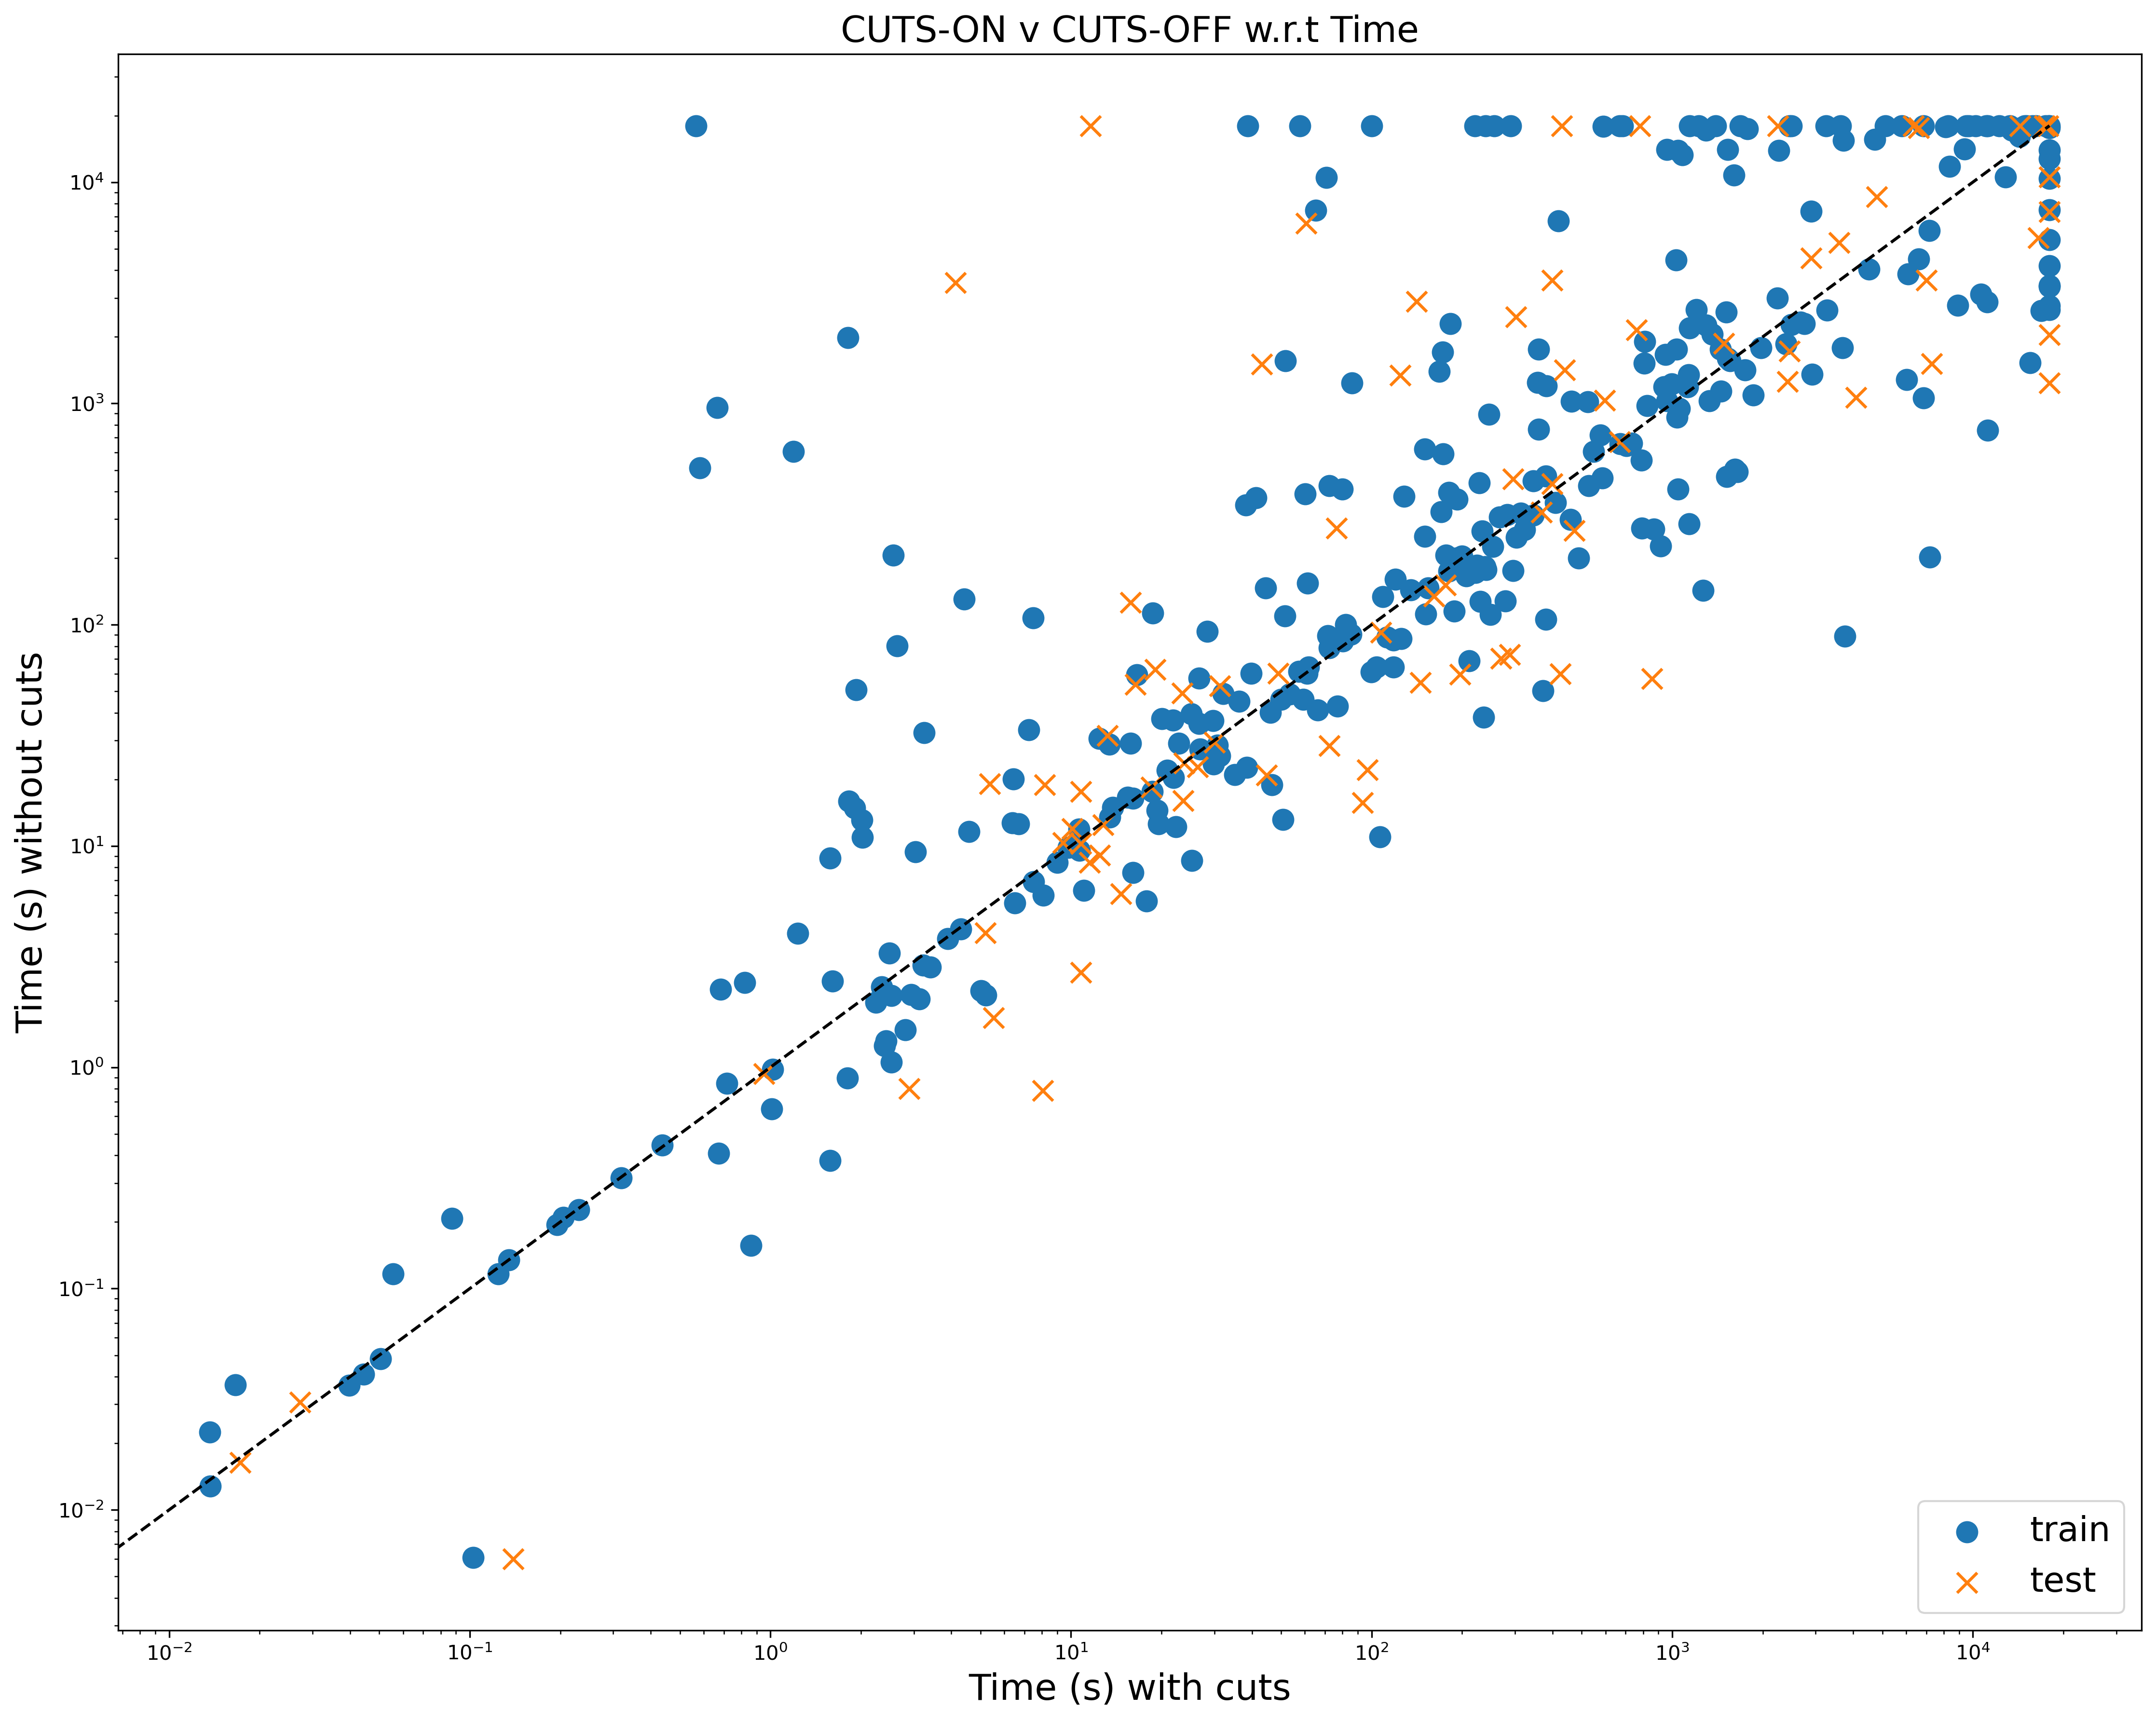

<Figure size 432x288 with 0 Axes>

In [113]:
## Plot of the distribution of instances in train and test
minx = 0
maxx = 18000

plt.figure(figsize=(15,12), dpi=300)
plt.scatter(x=train_df['TIME W/ CUTS'], y=train_df['TIME W/O CUTS'], s=100)
plt.scatter(x=test_df['TIME W/ CUTS'], y=test_df['TIME W/O CUTS'], s=100, marker='x')
plt.legend(["train" , "test"], loc='lower right', fontsize="xx-large")

plt.plot(range(int(minx),int(maxx)),range(int(minx),int(maxx)),'--', color='black')

plt.title('CUTS-ON v CUTS-OFF w.r.t Time', fontsize=18)
plt.xlabel('Time (s) with cuts', fontsize=18)
plt.ylabel('Time (s) without cuts', fontsize=18)



fig = plt.gcf()

ax_list=fig.axes
ax=ax_list[0]
ax.set_xscale("log")
ax.set_yscale("log")
plt.tight_layout()
plt.show()
plt.draw()
# fname = "unique"
# fig.savefig(fname, dpi=300)

In [114]:
## Data needed for a different notebook
for_plot = pd.concat([training, testing])
for_plot = for_plot.reset_index()
for_plot.to_csv('experiment_1_combined.csv')
testing.to_csv('experiment_1_test.csv')
training.to_csv('experiment_1_train.csv') 